In [ ]:
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to check the working directory
os.getcwd()

'/content'

In [ ]:
%cd /content/drive/My Drive/IDMChallenge/

/content/drive/My Drive/IDMChallenge


In [ ]:
train = pd.read_excel('Training.xlsx')
test = pd.read_excel('Testing.xlsx')

In [ ]:
# replacing null values with the mean of their column

train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [ ]:
df_onehot = pd.get_dummies(train)
df_test_onehot = pd.get_dummies(test)

In [ ]:
x = df_onehot.drop(columns=['ID','price_doc','school_education_centers_top_20_raion','build_count_foam','mosque_count_1000','mosque_count_2000','mosque_count_3000'])
print(x.shape)
y = df_onehot[['price_doc']]

x_test = df_test_onehot.drop(columns=['ID','school_education_centers_top_20_raion','build_count_foam','mosque_count_1000','mosque_count_2000','mosque_count_3000'])

(100000, 225)


In [ ]:
x_test.replace(('no', 'yes'), (1, 0), inplace=True)

In [ ]:
x_test.replace(('Investment', 'OwnerOccupier'), (1, 0), inplace=True)

In [ ]:
a = train['sub_area']
b = test['ecology']
Train2 = pd.concat([x,a], axis = 1)
Train2 = pd.concat([Train2,b], axis = 1)
# Train2 = pd.concat([Train2,Train['ecology']], axis = 1)
# Train2.dtypes

In [ ]:
# label encoding Ecology
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Train2[['ecology']])
# LabelEncoder()
# list(le.classes_)
Train2['ecology'] = le.transform(Train2[['ecology']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from IPython.display import display
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

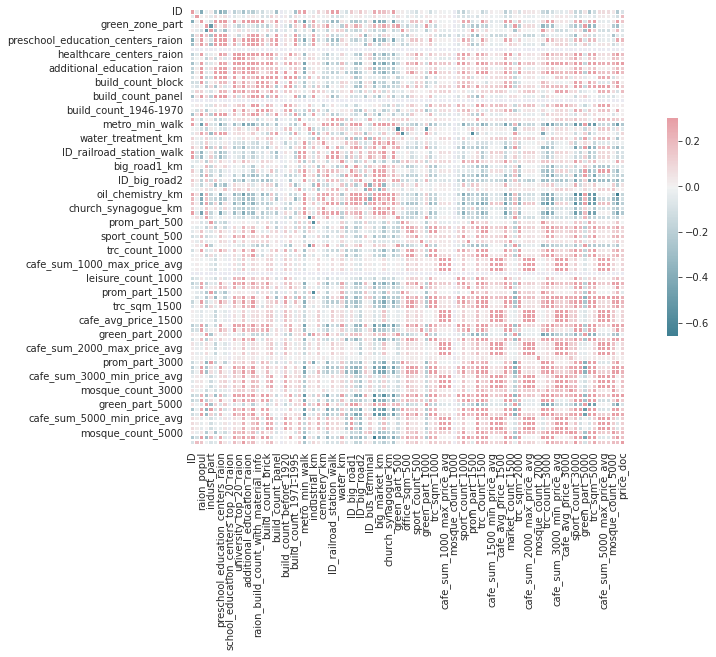

In [ ]:
# CORRELATION MAP TO SEE HOW FEATURES ARE CORRELATED WITH SALEPRICE
corrmat = train.corr()
plt.subplots(figsize=(15,8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(219, 9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}) #annot=True/False
plt.show()

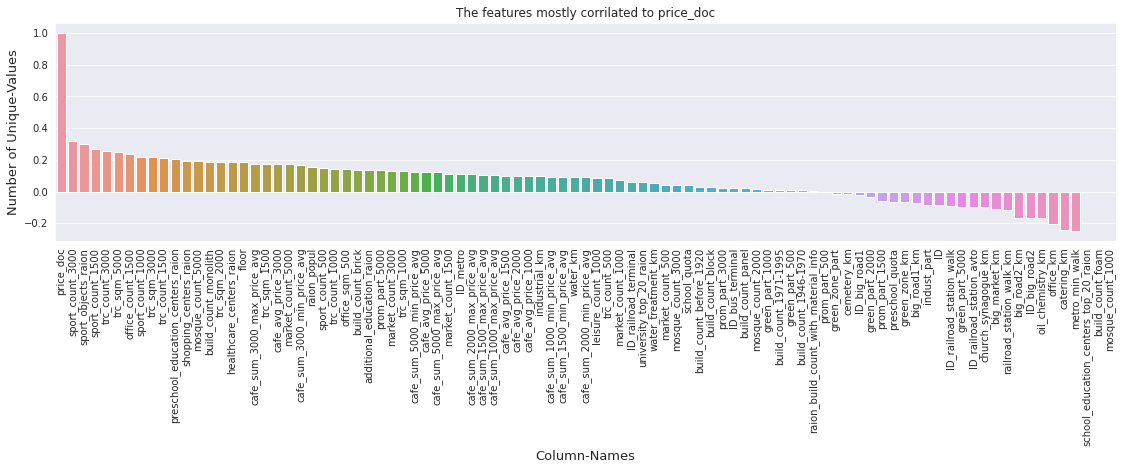

In [ ]:
# THE FEATURES MOSTLY CORRELATED TO SALESPRICE
cols = train.dtypes[train.dtypes != 'object'].index 
corrs=[]
for item in cols:
    corrs.append((df_onehot[item].corr(df_onehot['price_doc'])))
    
ist = pd.DataFrame(
    {'cols': cols,
     'corrs': corrs
    })
ist = ist.sort_values(by='corrs', ascending=False)
#ist.head()
plt.subplots(figsize=(19, 4))
sns.barplot(x=ist['cols'], y=ist['corrs'])
plt.xticks(rotation=90)
plt.ylabel('Number of Unique-Values', fontsize=13)
plt.xlabel('Column-Names', fontsize=13)
plt.title('The features mostly corrilated to price_doc')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = []

for column in train.columns:
    if train[column].dtype=='object':
          categorical_columns.append(column)

In [ ]:
for column in categorical_columns:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])

In [ ]:
#Gradient boosting
regGB = GradientBoostingRegressor(max_depth=10, max_features=8, min_samples_split=8,
                      n_estimators=1650, random_state=0)

regGB.fit(x, y)


In [ ]:
print(regGB.score(x, y))
#print(regGB.coef_) 
#print(regGB.intercept_)

0.975371084926135


In [ ]:
#Random forest
#regRF = RandomForestRegressor(max_depth=6, max_features=50, min_samples_split=8,n_estimators=500, random_state=0, criterion= 'absolute_error')
regRF= RandomForestRegressor(max_depth=6, max_features=50, min_samples_split=8,n_estimators=1000, n_jobs=-1, random_state=None, verbose=2)
regRF.fit(x,y)

In [ ]:
print(regRF.score(x, y))

In [ ]:
#DecisionTreeRegressor
regTree = DecisionTreeRegressor(max_depth=40,random_state=0)
regTree.fit(x,y)

DecisionTreeRegressor(max_depth=40, random_state=0)

In [ ]:
print(regTree.score(x, y))

0.9919130978412083


In [ ]:
import xgboost

In [ ]:
modelxg = xgboost.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1) 
modelxg.fit(x,y)

XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
             min_child_weight=1.7817, n_estimators=2200, nthread=-1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571, silent=1,
             subsample=0.5213)

In [ ]:
print(modelxg.score(x,y))

0.5999515688588615


In [ ]:
#ExtraTreeRegressor
#eg = ExtraTreesRegressor(n_estimators=400, max_depth=None, min_samples_split=2, max_features=1.0, max_leaf_nodes=None, n_jobs= -1, random_state=None, verbose=-3, max_samples=None)
eg = ExtraTreesRegressor(n_estimators=288, n_jobs= -1, random_state=None, verbose=2, min_samples_split=5)
eg.fit(x,y)

In [ ]:
print(eg.score(x, y))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    3.6s


0.9824521137157033


[Parallel(n_jobs=2)]: Done 288 out of 288 | elapsed:    6.4s finished


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
import xgboost as xgb

In [ ]:
import numpy as np

[14:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


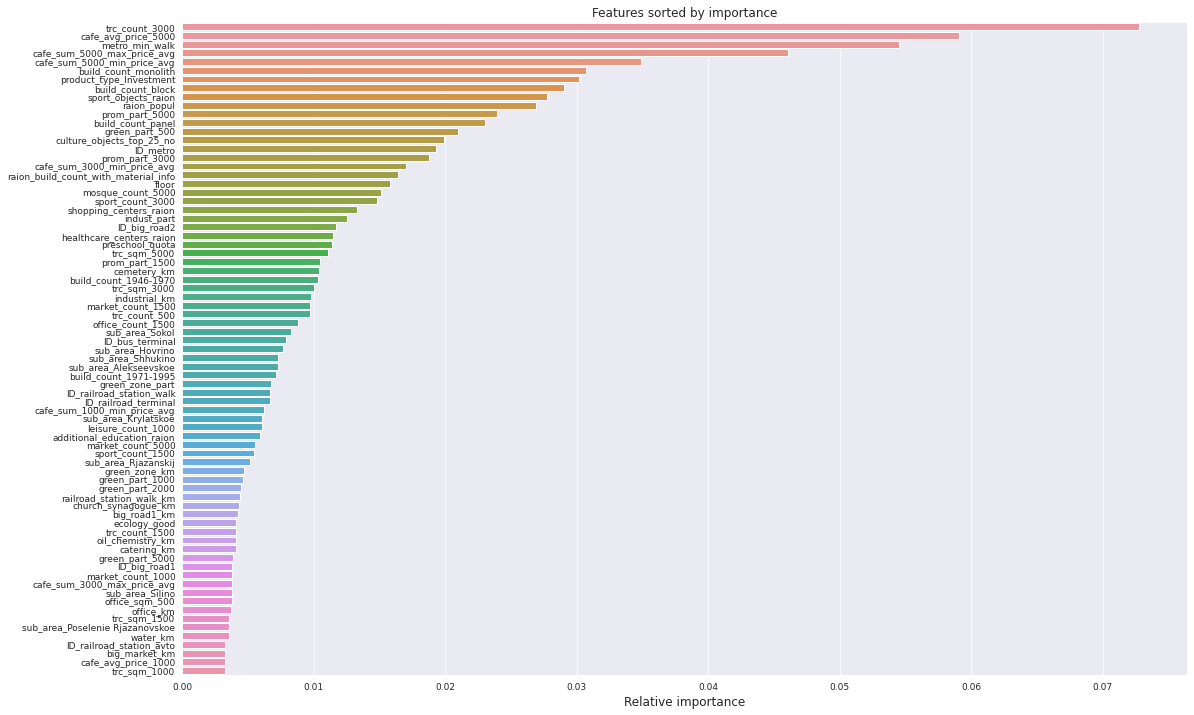

In [ ]:
# DEFINING MODEL
model = xgb.XGBRegressor()
model.fit(x, y)

# SORT FEATURE IMPORTANCES
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# VISUALIZATION
plt.subplots(figsize=(18, 12))
g = sns.barplot(y=x.columns[indices], x = model.feature_importances_[indices])
g.set_xlabel("Relative importance",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Features sorted by importance")
plt.show()

In [ ]:
xgb_train = x
xgb_test = x_test

model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1250,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=2)
model.fit(xgb_train, y)

# SELECTING THE MOST IMPORTANT FEATURES
xgb_feat_red = SelectFromModel(model, prefit = True)

# REDUCING ESTIMATION VALIDATION AND TEST DATASETS
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)

print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

In [ ]:
print(model.score(x, y))

0.6133276537215052


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2, interaction_only=False)
X2 = poly.fit_transform(x[['trc_count_3000', 'cafe_avg_price_5000','metro_min_walk','cafe_sum_5000_max_price_avg','cafe_sum_5000_min_price_avg','build_count_monolith','product_type_Investment']])
print(X2.shape)
regP = ExtraTreesRegressor(n_estimators=500, verbose=2).fit(X2,y)
print(regP.score(X2, y))


In [ ]:
poly = PolynomialFeatures(2, interaction_only=False)
Y2 = poly.fit_transform(x_test[['trc_count_3000', 'cafe_avg_price_5000','metro_min_walk','cafe_sum_5000_max_price_avg','cafe_sum_5000_min_price_avg','build_count_monolith','product_type_Investment']])
print(Y2.shape)

(30000, 29)


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
#forward selection
ols_reg = ExtraTreesRegressor()
sfs = SequentialFeatureSelector(ols_reg, direction='forward',n_features_names='')
sfs.fit(x, y)
print(sfs.get_feature_names_out())

In [ ]:
X_train= sfs.transform(x)
X_test= sfs.transform(x_test)
ols_reg.fit(X_train, y)
sfs_predict= ols_reg.predict(X_test)

In [ ]:
#print(sfs.score(x, y))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#k fold
cv = KFold(n_splits=10, random_state=1234, shuffle=True)
reg = GradientBoostingRegressor(max_depth=10, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)
    
# evaluate model
scores = cross_val_score(reg, x, y, cv=cv) 
print(sum(scores)/len(scores))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
reg2 = LinearRegression().fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print("LR: R2 = %.4f and MSE = %.2f" % (reg2.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

regTree = DecisionTreeRegressor(max_depth=10,random_state=0)
regTree.fit(X_train, y_train)
y_pred = regTree.predict(X_test)
print("DT: R2 = %.4f and MSE = %.2f" % (regTree.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

regRF = RandomForestRegressor(max_depth=6, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)
regRF.fit(X_train, y_train)
y_pred = regRF.predict(X_test)
print("RF: R2 = %.4f and MSE = %.2f" % (regRF.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

regGB = GradientBoostingRegressor(max_depth=10, max_features=4, min_samples_split=8,
                      n_estimators=300, random_state=0)
regGB.fit(X_train, y_train)
y_pred = regGB.predict(X_test)
print("GB: R2 = %.4f and MSE = %.2f" % (regGB.score(X_test,y_test), mean_squared_error(y_test, y_pred)))

eg = ExtraTreesRegressor(n_estimators=100, random_state=0,verbose=2,n_jobs=-1)
eg.fit(X_train, y_train)
y_pred = eg.predict(X_test)
print("RR: R2 = %.4f and MSE = %.2f" % (eg.score(X_test,y_test), mean_squared_error(y_test, y_pred)))


In [ ]:
#X = train.drop(columns=['price_doc','school_education_centers_top_20_raion','culture_objects_top_25'])
X= train.drop(columns=['price_doc', 'ID'])
#X = train[['market_count_1500', 'green_zone_km','water_treatment_km','big_market_km']]
#X = train[['market_count_1500', axis=1]
#X = train. iloc[:, [0,1,3,10,92]]
#test_new= test. iloc[:, [0,1,3,10]]
y = train['price_doc']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import tree
#model = LinearRegression()
#model.fit(x, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
reg2 = LinearRegression().fit(X_train, y_train)
print(reg2.score(X_train, y_train))
print(reg2.coef_)
print(reg2.intercept_)
y_pred_test = reg2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

In [ ]:
valid_sfs= sfs.transform(x_test)

In [ ]:
predict= ols_reg.predict(valid_sfs)
predict

array([[6501115.25837148],
       [6797045.32985497],
       [9628710.30394626],
       ...,
       [4196407.54651771],
       [4843086.04734461],
       [4811946.37022929]])

In [ ]:
#alter_test= test.drop(columns=['school_education_centers_top_20_raion','culture_objects_top_25'])
prediction = eg.predict(x_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done 288 out of 288 | elapsed:    5.6s finished


In [ ]:
output = pd.read_csv('sample.csv')

In [ ]:
output

In [ ]:
output['price_doc'] = prediction
output

,ID,price_doc
0,100001,6.003685e+06
1,100002,8.138340e+06
2,100003,1.827310e+07
3,100004,5.146636e+06
4,100005,6.249161e+06
...,...,...
29995,129996,4.338690e+06
29996,129997,2.218275e+06
29997,129998,4.839194e+06
29998,129999,1.211477e+06


In [ ]:
output.to_csv('sample.csv', index = False)

# **SFS**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
sfs = SequentialFeatureSelector(regGB, direction='forward',n_features_to_select=5)
sfs.fit(x, y)
print(sfs.get_feature_names_out())


In [ ]:
print("hello")